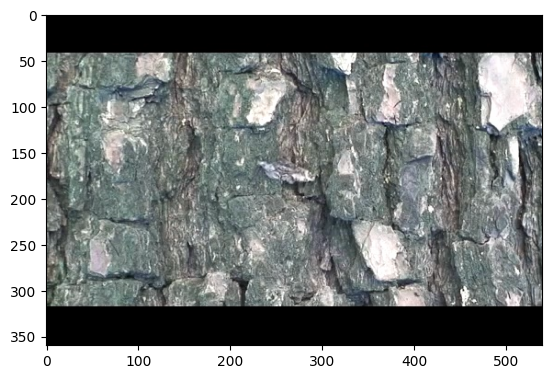

In [1]:
import cv2
import pylab
import os

path = "/mnt/fastdata/MoCA-Video-Test/moth/Frame"
frames = os.listdir(path)
pylab.imshow(cv2.imread(os.path.join(path, frames[0])))

In [ ]:
# import torch
# from diffusers import AutoPipelineForInpainting
# from diffusers.utils import load_image, make_image_grid

# pipeline = AutoPipelineForInpainting.from_pretrained(
#     "kandinsky-community/kandinsky-2-2-decoder-inpaint", torch_dtype=torch.float16
# )
# pipeline.enable_model_cpu_offload()
# # remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
# pipeline.enable_xformers_memory_efficient_attention()

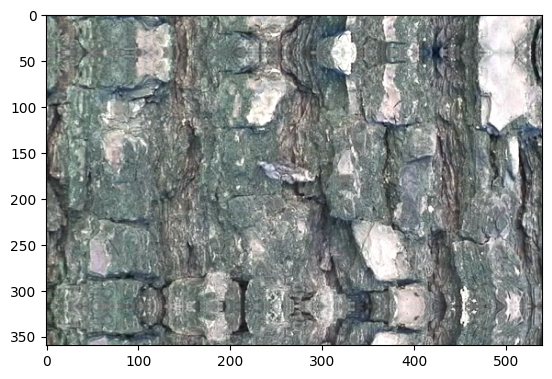

In [23]:
from PIL import Image
init_image = cv2.imread(os.path.join(path, frames[0]))
mask_image = cv2.imread(os.path.join(path, frames[0])) > 10

# crop the black margin
top_margin = mask_image.mean(1).nonzero()[0].min()
bottom_margin = mask_image.mean(1).nonzero()[0].max()

top_impaint = init_image[top_margin:2 * top_margin]
init_image[:top_margin] = top_impaint[::-1]
bottom_impaint = init_image[-2 *(init_image.shape[0] - bottom_margin):-(init_image.shape[0] - bottom_margin)]
init_image[-(init_image.shape[0] - bottom_margin):] = bottom_impaint[::-1]
pylab.imshow(init_image)    

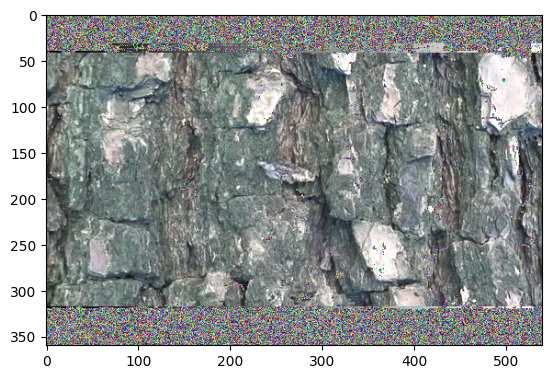

In [45]:
import numpy as np

img = cv2.imread(os.path.join(path, frames[0]))
# gray_gradient_band = np.arange(0, img.shape[0], 1).repeat(img.shape[1]).reshape(img.shape[1], img.shape[0]).T
# gray_gradient_band = cv2.normalize(gray_gradient_band, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
# gray_gradient_band = cv2.cvtColor(gray_gradient_band, cv2.COLOR_GRAY2BGR)
margin = (img.std(-1)<0.1)[:,:,None]
img = np.where(margin, np.random.rand(*img.shape) * 255, img)/255
pylab.imshow(img)

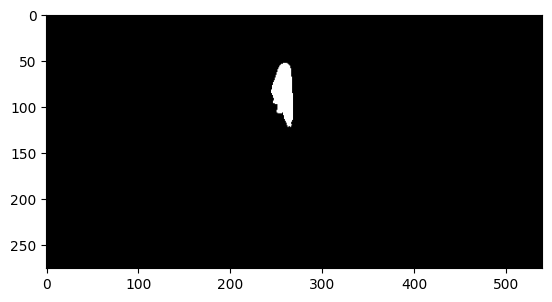

In [27]:
path = "/mnt/fastdata/MoCA-Video-Test/moth/GT"
frames = os.listdir(path)

for i in frames:
    img = cv2.imread(os.path.join(path, i))
    img = img[top_margin:bottom_margin]
    cv2.imwrite(os.path.join(path, i), img)
pylab.imshow(img)